In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../data/sonar.all-data.csv")
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v52,v53,v54,v55,v56,v57,v58,v59,v60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
df.shape

(208, 61)

In [4]:
#find missing values
df.isna().sum()

v1       0
v2       0
v3       0
v4       0
v5       0
        ..
v57      0
v58      0
v59      0
v60      0
Class    0
Length: 61, dtype: int64

In [5]:
x=df.drop(columns=['Class'])
df["Class"]=df["Class"].map({"R":1,"M":0})
y=df['Class']

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
#convert 'class' column to categorical data(0,1) and define independent variable(x) and dependent variable(y)
x=df.drop(columns=['Class'])
df["Class"]=df["Class"].map({"R":1,"M":0})
y=df['Class']

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [9]:
ypred=model.predict(xtest)

Accuracy is : 0.7857142857142857
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        21
           1       0.83      0.71      0.77        21

    accuracy                           0.79        42
   macro avg       0.79      0.79      0.78        42
weighted avg       0.79      0.79      0.78        42



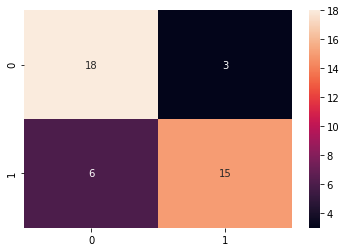

In [10]:
#evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

#### Standardize the variables

Because the KNN classifier predicts the class of a given test observation by identifying the observation that are nearest to it,the scale of the variables matters.<br>Any variables that are on large scale will have a much larger effect on the distance<br> between the observations,and hence on the KNN classifier, than variables thar are on a small scale.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
sc_xtrain=scaler.fit_transform(xtrain)
sc_xtest=scaler.fit_transform(xtest)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(sc_xtrain,ytrain)

KNeighborsClassifier()

In [14]:
ypred=model.predict(sc_xtest)

Accuracy is : 0.8095238095238095
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.88      0.71      0.79        21

    accuracy                           0.81        42
   macro avg       0.82      0.81      0.81        42
weighted avg       0.82      0.81      0.81        42



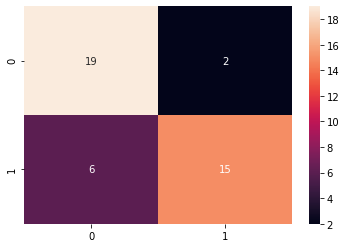

In [15]:
#evaluation 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

#### Tunning of KNN Parameter

In [16]:
#model 
model=KNeighborsClassifier()
#parameter grid
#1. n_neighbors 
#2.weights
#3.Metric
n_neighbors=range(1,31)
weights =['uniform', 'distance']
metric=["minkowski","euclidean","manhattan"]
grid=dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(sc_xtrain,ytrain)

In [17]:
res.best_score_

0.8672014260249554

In [18]:
res.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=11,metric='manhattan',weights= 'uniform')
model.fit(sc_xtrain,ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [20]:
ypred=model.predict(sc_xtest)

Accuracy is : 0.7857142857142857
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.80      0.76      0.78        21

    accuracy                           0.79        42
   macro avg       0.79      0.79      0.79        42
weighted avg       0.79      0.79      0.79        42



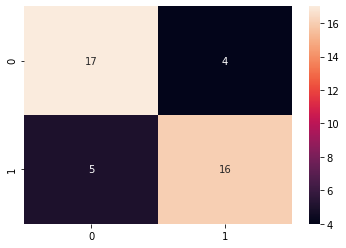

In [21]:
#evaluation 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### Implement SVM On Sonar Dataset

In [22]:
from sklearn.svm import SVC
model=SVC(C=1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        21
           1       0.93      0.62      0.74        21

    accuracy                           0.79        42
   macro avg       0.82      0.79      0.78        42
weighted avg       0.82      0.79      0.78        42



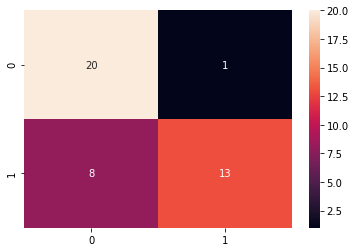

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc=accuracy_score(ytest,ypred)
print("Accuracy is:",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

#### SVM Hyper Parameter Tunning

In [24]:
#model
model=SVC()
#parameters
kernel=['linear','poly','rbf','sigmoid']
C=[1,0.1,0.01,0.001]
#grid
grid=dict(kernel=kernel,C=C)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
#result
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'C': 1, 'kernel': 'rbf'}
0.7892453951277482


In [25]:
from sklearn.svm import SVC
model=SVC(C=1,kernel='linear')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       1.00      0.71      0.83        21

    accuracy                           0.86        42
   macro avg       0.89      0.86      0.85        42
weighted avg       0.89      0.86      0.85        42



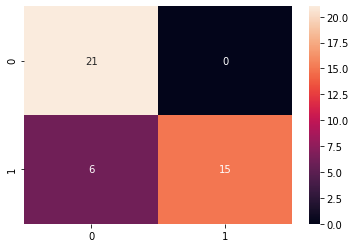

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc=accuracy_score(ytest,ypred)
print("Accuracy is:",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

### Implement Naive Bayes on the dataset
###### 1.GaussianNB
###### 2.Multinomial NB

In [27]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(ypred)

[1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0
 1 0 0 1 0]


Accuracy is : 0.6666666666666666
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        21
           1       0.65      0.71      0.68        21

    accuracy                           0.67        42
   macro avg       0.67      0.67      0.67        42
weighted avg       0.67      0.67      0.67        42



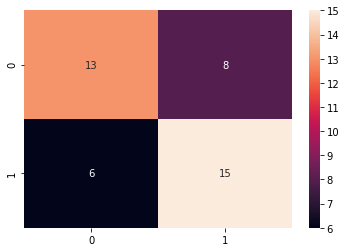

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

In [29]:
# Multinomial NB
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(ypred)

[0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 1]


Accuracy is : 0.6190476190476191
              precision    recall  f1-score   support

           0       0.59      0.76      0.67        21
           1       0.67      0.48      0.56        21

    accuracy                           0.62        42
   macro avg       0.63      0.62      0.61        42
weighted avg       0.63      0.62      0.61        42



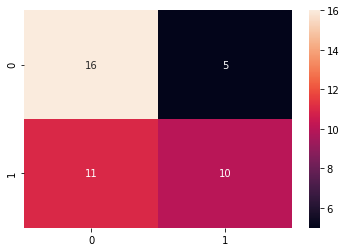

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))